___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Freddy Dratwa

#### Victor Vazquez

#### Michel Haggiag

#### Allan Singer

#### Ricardo Ferraro

___

# Estudo do preço do carro

___

## A. INTRODUÇÃO

O objetivo deste projeto é chegar ao melhor modelo possível que seja capaz de prever o preço de um carro usado nos EUA a partir das características presentes no dataset:
    - Preço;
    - Ano;
    - Quilometragem;
    - Cidade;
    - Estado;
    - Marca;
    - Modelo;
    - Número de Chassis.

A base de dados possui 1.2 milhão de carros com data de produção entre os anos 1997 a 2018 de 58 marcas diferentes, sendo estes 2914 modelos distintos com o preço mÍnimo de US1.500,00 e máximo de US462.000,00 , com a mínima quilometragem 8 Km e a máxima 2.286.260,8 Km.<br>

Como uma primeira previsão, imagina-se que algumas das características do dataset influenciam mais no preço do carro do que outras. Por exemplo, é de se esperar que um carro comprado há mais tempo tenha seu preço menor atualmente. Ou seja, a variavel "Ano", que representa o ano em que o carro foi fabricado, deve influenciar muito no preço do veículo, bem como a quilometragem, onde um carro que foi comprado mas usado pouco deve permanecer mais barato do que um usado muitas vezes.<br>



___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

### BASE DE DADOS

**Limpando e tratando dataset**

Nas células abaixo, o dataset é limpo e reorganiazdo. Para se fazer isso, a coluna "Chassi" é removoida, pois esta é uma característica individual para cada veículo e não influencia no preço final do mesmo, acompanhada da variável "Estado", que é retirada pois a localização onde o carro é usado não altera seu preço após um certo período de tempo. Alem disso, duas colunas vazias foram reitradas. Então, a variável milhagem foi transformada em quilometragem, multplicando seu valor por 1.6. Por último, a variavel ano foi transformada em idade, ou seja, a diferença do ano atual (2019) para o ano em que o carro foi vendido. 

In [2]:
dataset = pd.read_csv("Dataframe.csv")

In [3]:
dataset.head()

,Unnamed: 0,Id,Price,Year,Mileage,City,State,Vin,Make,Model,Unnamed: 9,Unnamed: 10
0,0,79293.0,18684.0,2015.0,12499.0,Owensboro,KY,3C4PDCBB6FT631351,Dodge,JourneySXT,NaN,NaN
1,1,190834.0,26318.0,2016.0,8477.0,Corpus Christi,TX,WBA8E1G52GNT36643,BMW,3,NaN,NaN
2,2,670383.0,25802.0,2014.0,65878.0,Port Lavaca,TX,1FM5K7F80EGC01722,Ford,ExplorerLimited,NaN,NaN
3,3,586732.0,9899.0,2005.0,108512.0,Lindon,UT,1D7HW48N05S164407,Dodge,Dakota4WD,NaN,NaN
4,4,37609.0,30999.0,2016.0,8358.0,Fond du Lac,WI,1FA6P8CF2G5310562,Ford,MustangFastback,NaN,NaN


In [4]:
if "Vin" in dataset:
    dataset = dataset.drop(columns=["Vin", "Unnamed: 9", "Unnamed: 10", "Unnamed: 0"])
    dataset["Mileage"] = dataset["Mileage"].apply(lambda x: x*1.6)

    dataset.columns = ["ID","PRECO","ANO","KM","CIDADE","ESTADO","MARCA","MODELO"]
    dataset["IDADE"] = dataset["ANO"].apply(lambda x: 2019-x)

    dataset.ID = dataset.ID.astype("float")
    dataset.PRECO = dataset.PRECO.astype("float")
    dataset.ANO = dataset.ANO.astype("float")
    dataset.KM = dataset.KM.astype("float")
    dataset.IDADE = dataset.IDADE.astype("float")
    dataset.CIDADE = dataset.CIDADE.astype("category")
    dataset.ESTADO = dataset.ESTADO.astype("category")
    dataset.MARCA = dataset.MARCA.astype("category")
    dataset.MODELO = dataset.MODELO.astype("category")

    dataset["ESTADO"] = dataset["ESTADO"].apply(lambda x: x.upper())
    dataset["CIDADE"] = dataset["CIDADE"].apply(lambda x: x.upper())
    dataset["MARCA"] = dataset["MARCA"].apply(lambda x: x.upper())
    dataset = dataset[["ID","PRECO","ANO","IDADE","KM","CIDADE","ESTADO","MARCA","MODELO"]]
    
dataset.head()

,ID,PRECO,ANO,IDADE,KM,CIDADE,ESTADO,MARCA,MODELO
0,79293.0,18684.0,2015.0,4.0,19998.4,OWENSBORO,KY,DODGE,JourneySXT
1,190834.0,26318.0,2016.0,3.0,13563.2,CORPUS CHRISTI,TX,BMW,3
2,670383.0,25802.0,2014.0,5.0,105404.8,PORT LAVACA,TX,FORD,ExplorerLimited
3,586732.0,9899.0,2005.0,14.0,173619.2,LINDON,UT,DODGE,Dakota4WD
4,37609.0,30999.0,2016.0,3.0,13372.8,FOND DU LAC,WI,FORD,MustangFastback


## ANÁLISE DESCRITIVA

Nas celulas que seguem, ocorre a análise descritiva das variaveis, semelhante ao projeto 1. Em um primeiro momento, serão analisadas cada uma das variáveis. 

**Características da variável Preço**

In [5]:
dataset["PRECO"].describe()

count    100000.000000
mean      21032.639190
std       13079.287997
min        1500.000000
25%       12991.000000
50%       17995.000000
75%       26590.000000
max      429900.000000
Name: PRECO, dtype: float64

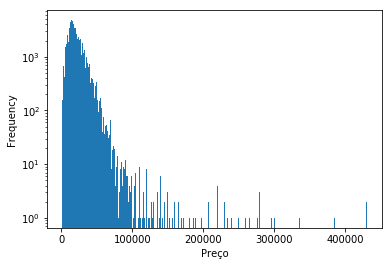

In [6]:
dataset["PRECO"].plot.hist(logy = True, bins = 500);
plt.xlabel("Preço");

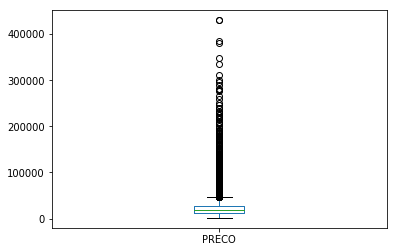

In [7]:
dataset["PRECO"].plot.box()
plt.show()

Análise:

A primeira variável 

**Características da variável Idade**

In [8]:
dataset["IDADE"].describe()

count    100000.00000
mean          5.68960
std           3.42571
min           1.00000
25%           3.00000
50%           5.00000
75%           7.00000
max          22.00000
Name: IDADE, dtype: float64

In [9]:
dataset["IDADE"].value_counts().head(5)

4.0    18254
5.0    18123
3.0    15668
2.0    11483
6.0     8853
Name: IDADE, dtype: int64

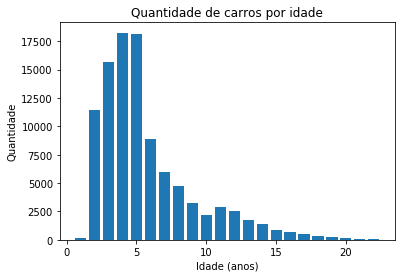

In [10]:
quantidade_por_idade = []
for i in range(22):
    quantidade_por_idade.append(len(dataset["IDADE"].loc[dataset["IDADE"] == i+1]))


plt.bar(np.arange(1,23,1), quantidade_por_idade)
plt.title("Quantidade de carros por idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Quantidade")
plt.show()

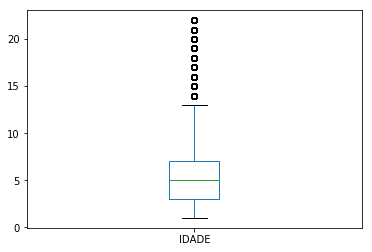

In [11]:
dataset["IDADE"].plot.box()
plt.show()

Análise:

A terceira variável analisada é a idade. Esta é a diferença entre o ano de hoje (2019), para o ano em que o carro foi fabricado. Após as plotagens do histograma e do boxplot, nota-se a grande maioria dos carros foi tem até 5 anos de idade, ou seja, a maioria deles são carros "jovens". Esta informação é confirmada pelo boxplot. Entretanto, existem alguns outliers, que ficam evidenciados em ambos os gráficos. Eles mostram que varios carros têm mais do que 5 anos de idade.

**Características da variável Km**

In [12]:
dataset["KM"].describe()

count    1.000000e+05
mean     8.462736e+04
std      6.670870e+04
min      8.000000e+00
25%      3.883040e+04
50%      6.530400e+04
75%      1.160008e+05
max      2.062016e+06
Name: KM, dtype: float64

(-10000, 400000)

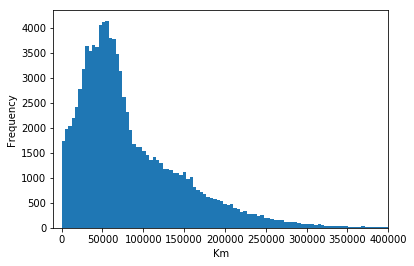

In [13]:
dataset["KM"].plot.hist(bins=500);
plt.xlabel("Km");
plt.xlim(-10000,400000)

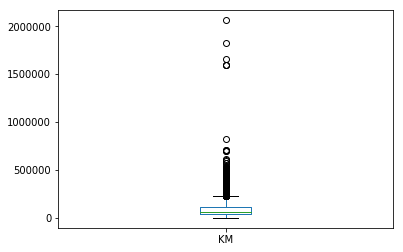

In [14]:
dataset["KM"].plot.box()
plt.show()

Análise:

A próxima variavel analisada é a quilometragem, ou seja, quantos quilometros os carros ja rodaram. Pelo fato de a maioria dos carros terem sido fabricados há menos de 10 anos, imagina-se que em sua maioria, os carros não tenham quilometragem alta. Esta hipótese é confirmada pelos gráficos. Com a plotagem do histograma e do boxplot, percebe-se que a maioria dos carros tem 50000 km rodados, sendo que existem alguns com mais e outros com menos. Este já é um número considerável mas, como pode se ver no boxplot, existem carros com mais de 3 milhões de km rodados. Assim, 50000 parece um numero pequeno. Tambem fica claro pelo boxplot que existe uma quantidade consideravel de outliers. Mesmo assim, a concentração maior se encontra nos 50000 km. 

**Característica da variável Marca**

In [15]:
dataset["MARCA"].describe()

count     100000
unique        58
top         FORD
freq       15317
Name: MARCA, dtype: object

In [16]:
dataset["MARCA"].value_counts().head(10)

FORD             15317
CHEVROLET        14362
HONDA             7289
NISSAN            6940
JEEP              5726
HYUNDAI           5305
DODGE             4871
KIA               4091
GMC               4071
MERCEDES-BENZ     3572
Name: MARCA, dtype: int64

Análise:

Como é de se imaginar, o preço de um veículo é muito afetado pela sua marca. Por exemplo, uma Ferrari será muito mais cara do que a grande maioria dos carros da ford, por exemplo. Além disso, nota-se a partir da análise dos value counts feitos que existem muito mais carros de marcas popuares, justamente por que são mais baratos. 

**Característica da variável Modelo**

In [17]:
dataset["MODELO"].describe()

count        100000
unique         2109
top       Silverado
freq           3431
Name: MODELO, dtype: object

In [18]:
dataset["MODELO"].value_counts().head(10)

Silverado    3431
Grand        2388
Altima2.5    1532
Sierra       1503
Accord       1434
F-1504WD     1268
Civic        1164
Wrangler     1142
3            1045
Santa         944
Name: MODELO, dtype: int64

Análise:

A variável analisada é o modelo do carro. O modelo usará esta para prever o preço do carro usando a seguinte lógica: se um modelo encontra-se entre os mais comprados, provavelmente significa que é um dos mais baratos, por que, geralmente os carros mais vendidos são aqueles mais baratos.

### ANÁLISE DESCRITIVA

(-10000, 500000)

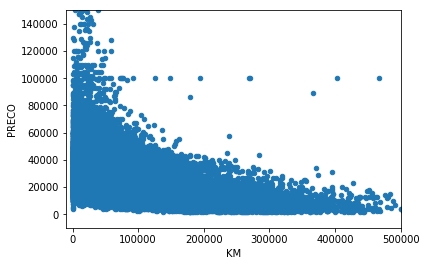

In [19]:
dataset.plot.scatter(y = "PRECO", x = "KM");
plt.ylim(-10000,150000)
plt.xlim(-10000,500000)

Analisando o gráfico Preço x Km, nota-se que o preço do veículo vai caindo conforme a quilometragem do mesmo aumenta, na maioria dos casos.

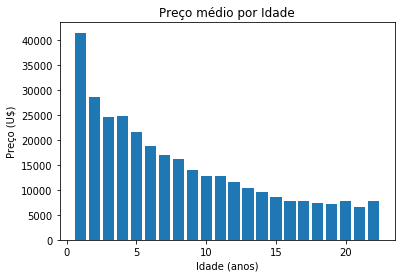

In [20]:
price_mean_by_year = []
for i in range(22):
    price_mean_by_year.append(dataset[dataset.IDADE == 1+i].PRECO.mean())
plt.bar(np.arange(1,23,1), price_mean_by_year)
plt.title("Preço médio por Idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Preço (U$)")
plt.show()

Analisando o gráfico, é possível verificar que o preço dos carros diminui conforme o mesmo envelhece. Também é possível verificar que há queda mais efetiva no preço nos primeiros anos. 

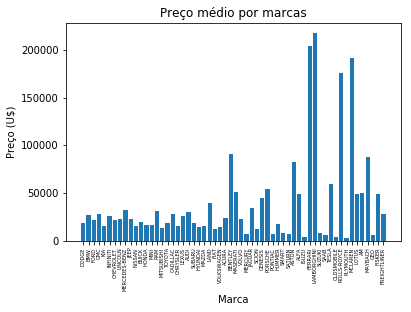

In [21]:
marcas = dataset["MARCA"].unique()

price_mean_by_marca = []
for i in marcas:
    price_mean_by_marca.append(dataset[dataset.MARCA == i].PRECO.mean())

plt.bar(marcas, price_mean_by_marca)
plt.xticks(rotation = 90, fontsize = 5)
plt.title("Preço médio por marcas")
plt.xlabel("Marca")
plt.ylabel("Preço (U$)")
plt.show()


O gráfico acima permite afirmar o que foi previsto na análise das informações do modelo do veículo. Como imaginado, o preço dos veículos aumenta conforme a marca. Por exemplo, as que têm os veículos mais caros são Rolss-Royce, Ferrari, Lambhorghini e Mercedes, justamente as marcas que esperava-se que teriam carros mais caros, por serem mais "famosas" por terem carros de alto nivel.

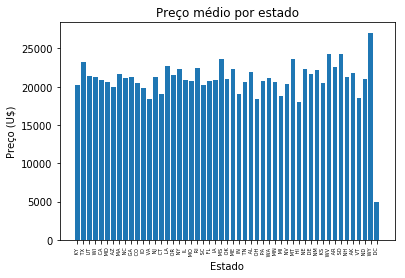

In [22]:
estados = dataset["ESTADO"].unique()

price_mean_by_estado = []
for i in estados:
    price_mean_by_estado.append(dataset[dataset.ESTADO == i].PRECO.mean())

plt.bar(estados, price_mean_by_estado)
plt.xticks(rotation = 90, fontsize = 5)
plt.title("Preço médio por estado")
plt.xlabel("Estado")
plt.ylabel("Preço (U$)")
plt.show()

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

**Separando a base de dados em treinamento e teste aleatoriamente**

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS